In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from IPython.display import display
pd.options.display.max_columns = None #show all columns
from scipy.stats import skew

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_df.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [5]:
x = train_df.columns.to_series().groupby(train_df.dtypes).groups
x , x.keys()

({dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
         'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
         'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
         'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
         'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
         'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
         'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
        dtype='object'),
  dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
  dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
         'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
         'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
         'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       

In [99]:
#list(enumerate(train_df.columns))

In [7]:
x2  = pd.Series(train_df.columns.to_series().groupby(train_df.dtypes))
print('  ',x2.iloc[0][0],':',len(x2.iloc[0][1]),'\n', 
      x2.iloc[1][0],':',len(x2.iloc[1][1]),'\n ',
      x2.iloc[2][0],':', len(x2.iloc[2][1])) #37 variables either int or float

   int64 : 35 
 float64 : 3 
  object : 43


In [8]:
xint = x2.iloc[0][1].tolist() 
xfloat = x2.iloc[1][1].tolist() 

In [9]:
xint, xfloat, len(xint+xfloat)

(['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
 38)

In [10]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [11]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [12]:
#corr = train_df.corr()
#plt.matshow(corr)
#plt.set_xticklabels(corr.columns.values)  

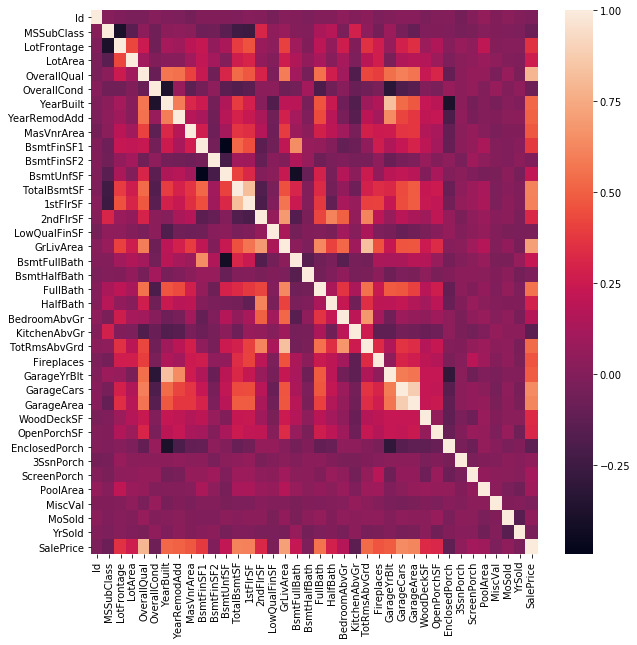

In [13]:
corr = train_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [14]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

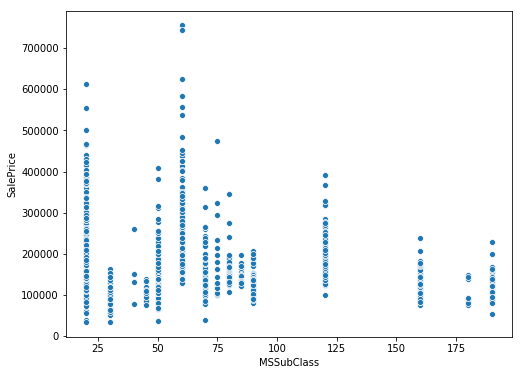

In [15]:
sns.scatterplot( 'MSSubClass', 'SalePrice',data = train_df) 

In [16]:
train_numeric = train_df._get_numeric_data() 

In [17]:
train_numeric.head()
train_numeric.shape

(1460, 38)

In [18]:
len(train_df.corr())

38

In [19]:
corr_matrix = train_df.corr()
print(len(corr_matrix))
corr_matrix.SalePrice.sort_values(ascending=False).drop(['SalePrice'])

38


OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [20]:
train_df.GrLivArea.head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [21]:
train_df.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

Intercept    -6915.380674
GrLivArea       80.671318
GarageArea     138.657245
dtype: float64


/Users/aungshumaan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


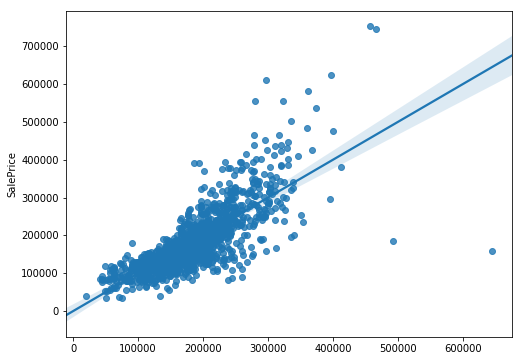

In [22]:
import statsmodels.formula.api as sm
## Fit a linear model
result = sm.ols(formula=" SalePrice ~ GrLivArea + GarageArea ", data=train_df).fit()
print(result.params)
len(result.predict()), len(train_df.SalePrice)
sns.regplot(x=result.predict(), y='SalePrice', data=train_df)

/Users/aungshumaan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


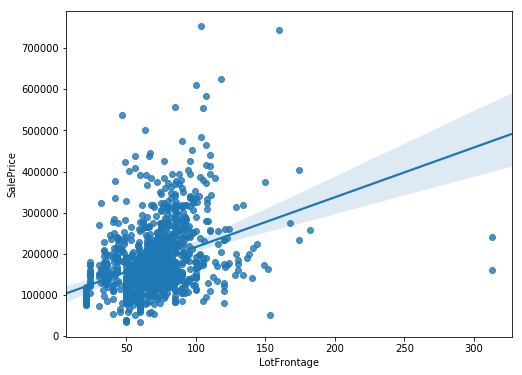

In [23]:
sns.regplot(x='LotFrontage', y='SalePrice', data=train_df)

/Users/aungshumaan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


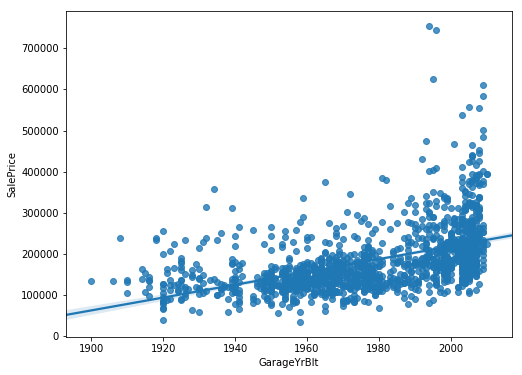

In [24]:
sns.regplot(x='GarageYrBlt', y='SalePrice', data=train_df)

/Users/aungshumaan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


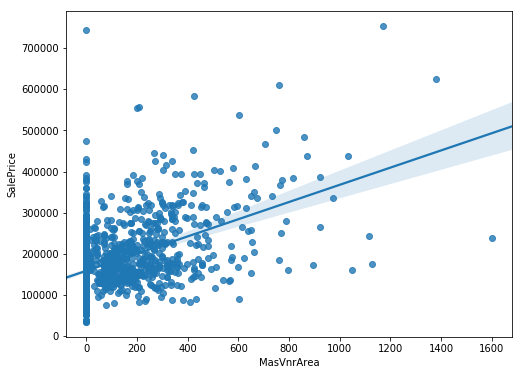

In [25]:
sns.regplot(x='MasVnrArea', y='SalePrice', data=train_df)

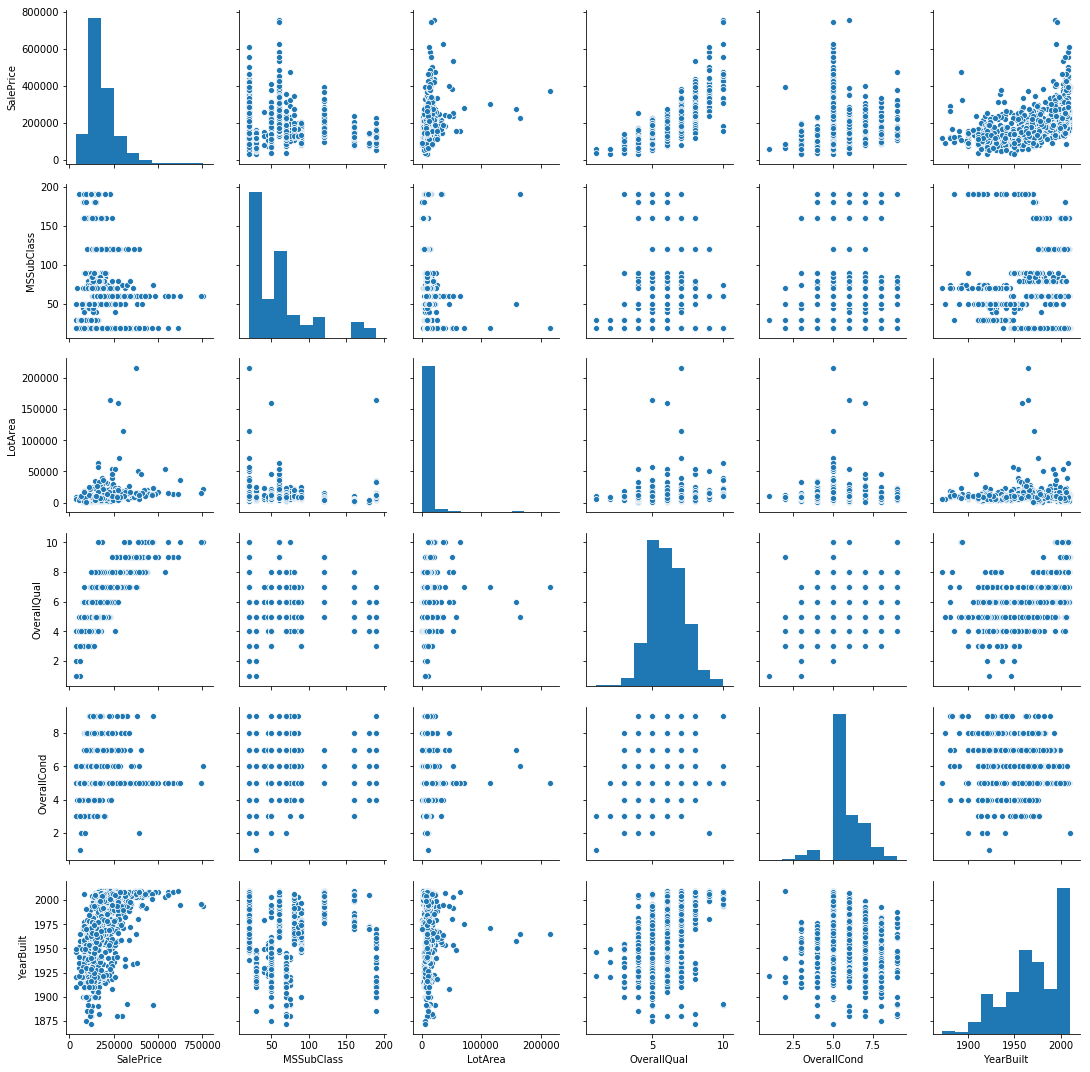

In [26]:
sns.pairplot(train_df, vars = ['SalePrice']+ xint[1:6]) 

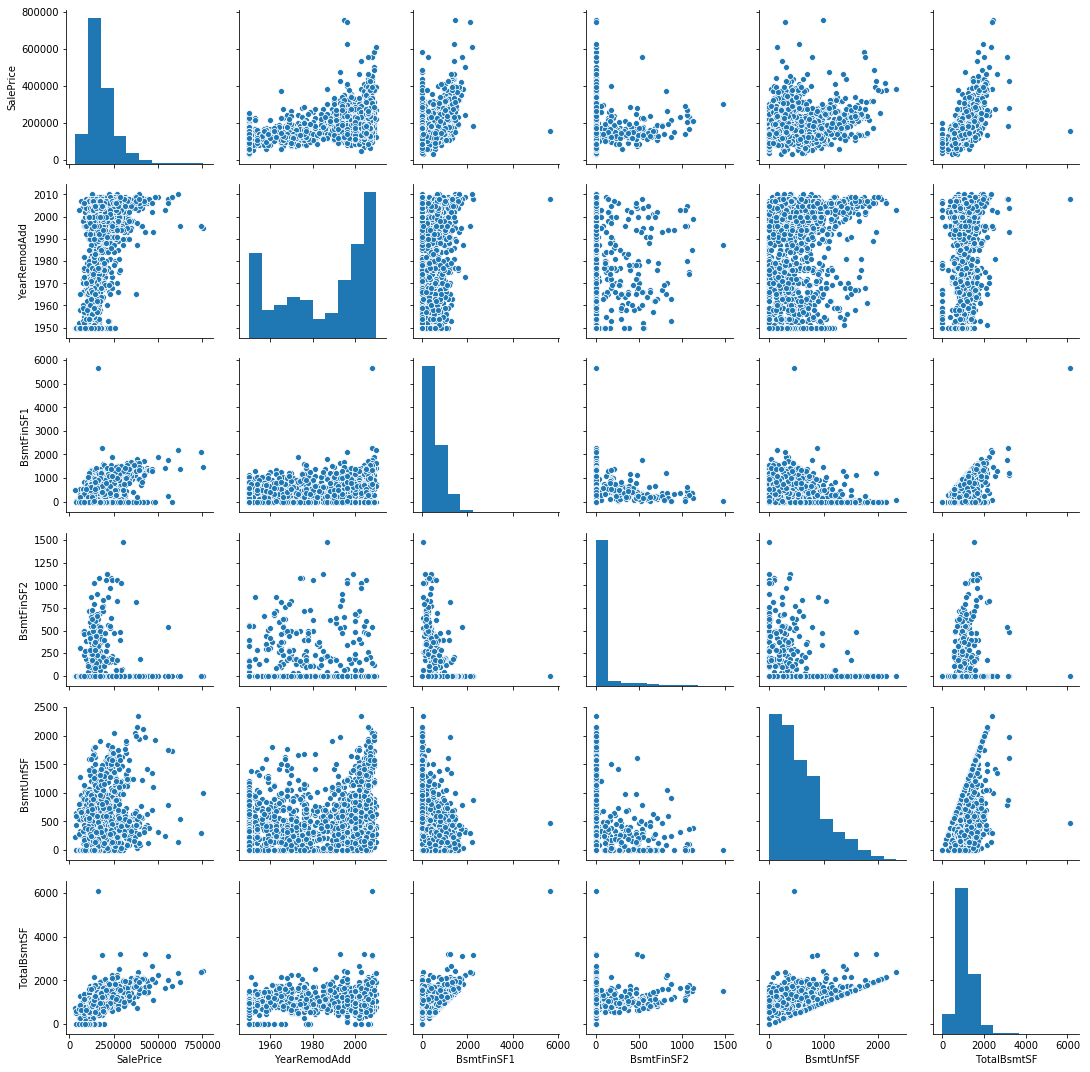

In [27]:
sns.pairplot(train_df, vars = ['SalePrice']+ xint[6:11]) 

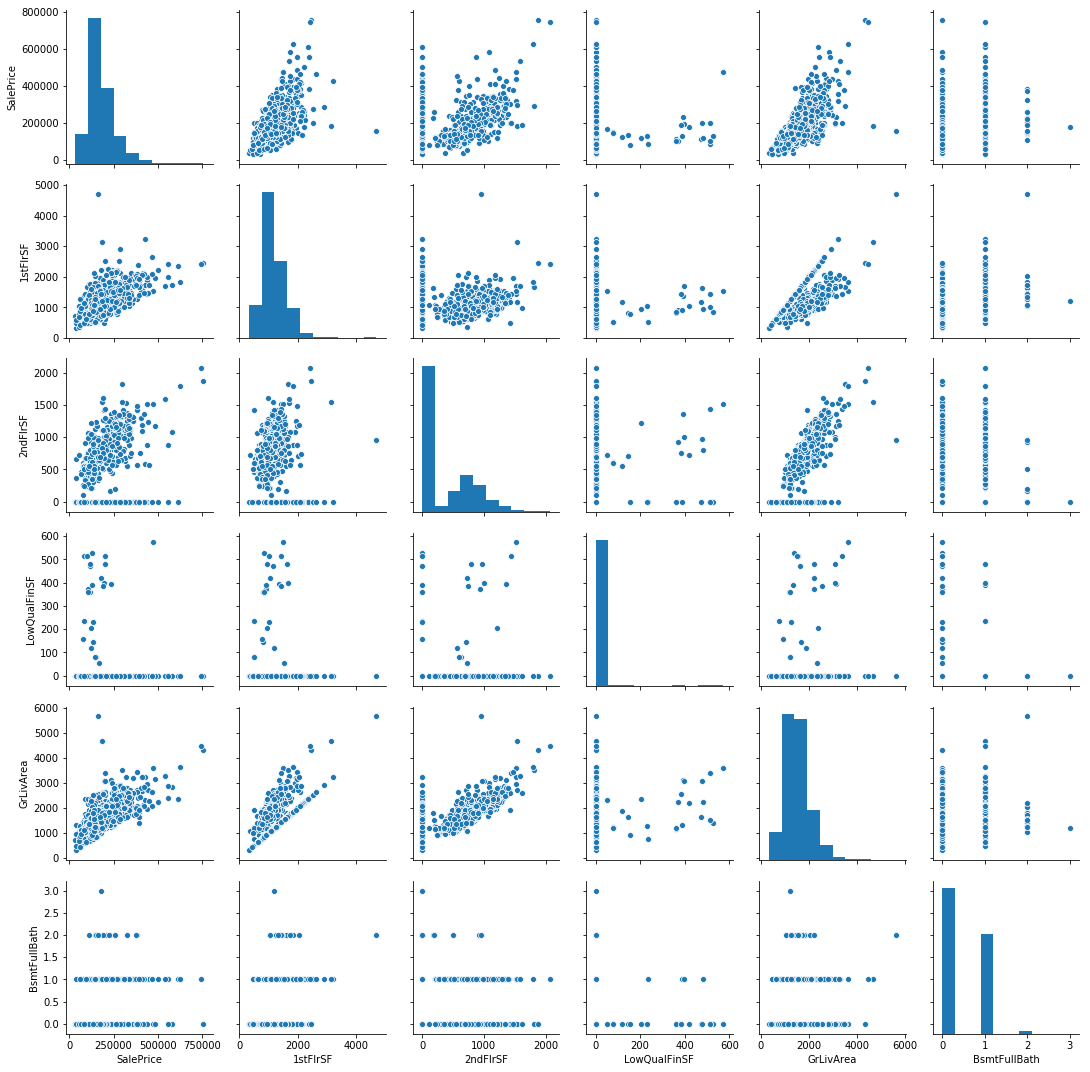

In [28]:
sns.pairplot(train_df, vars = ['SalePrice']+ xint[11:16]) 

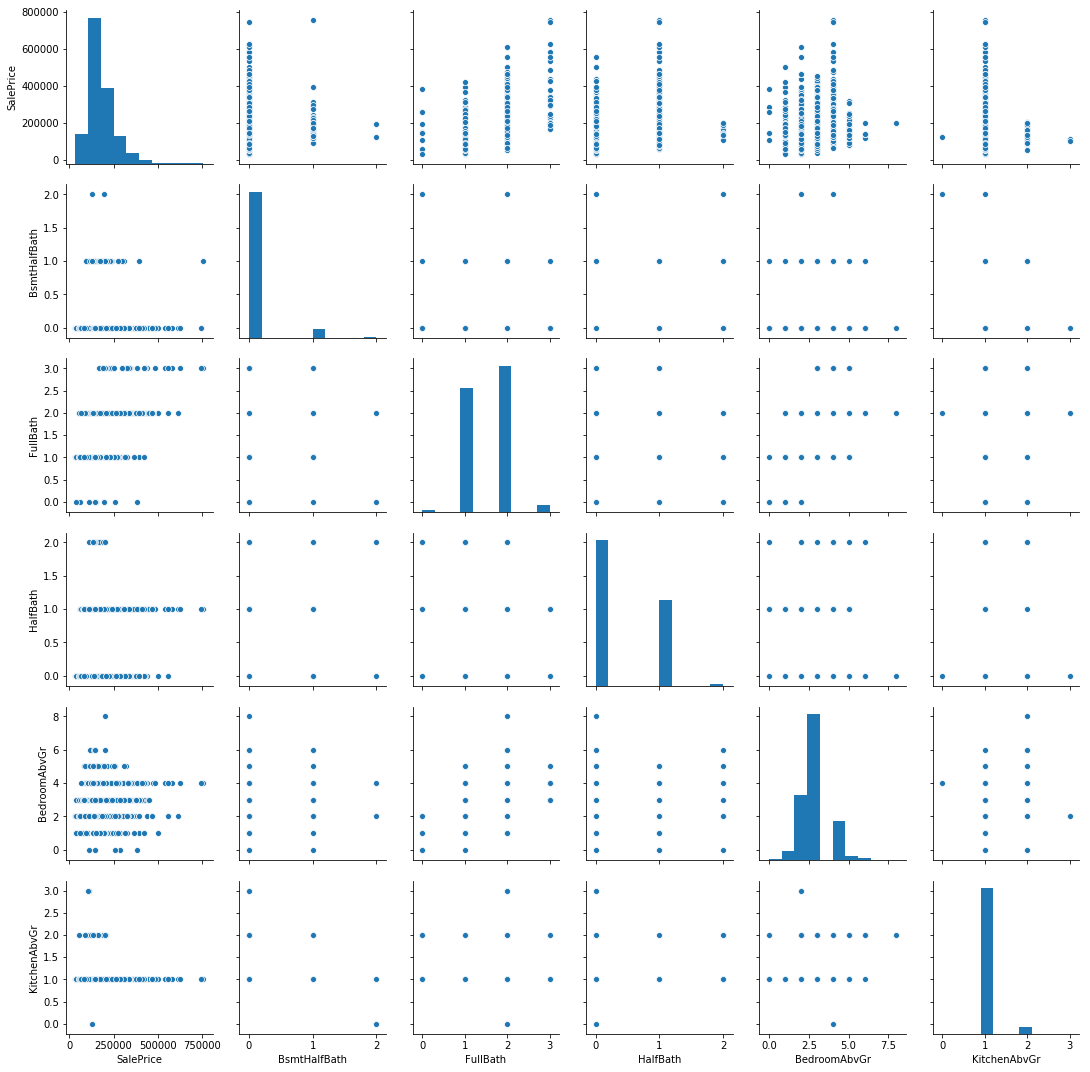

In [29]:
sns.pairplot(train_df, vars = ['SalePrice']+ xint[16:21]) 

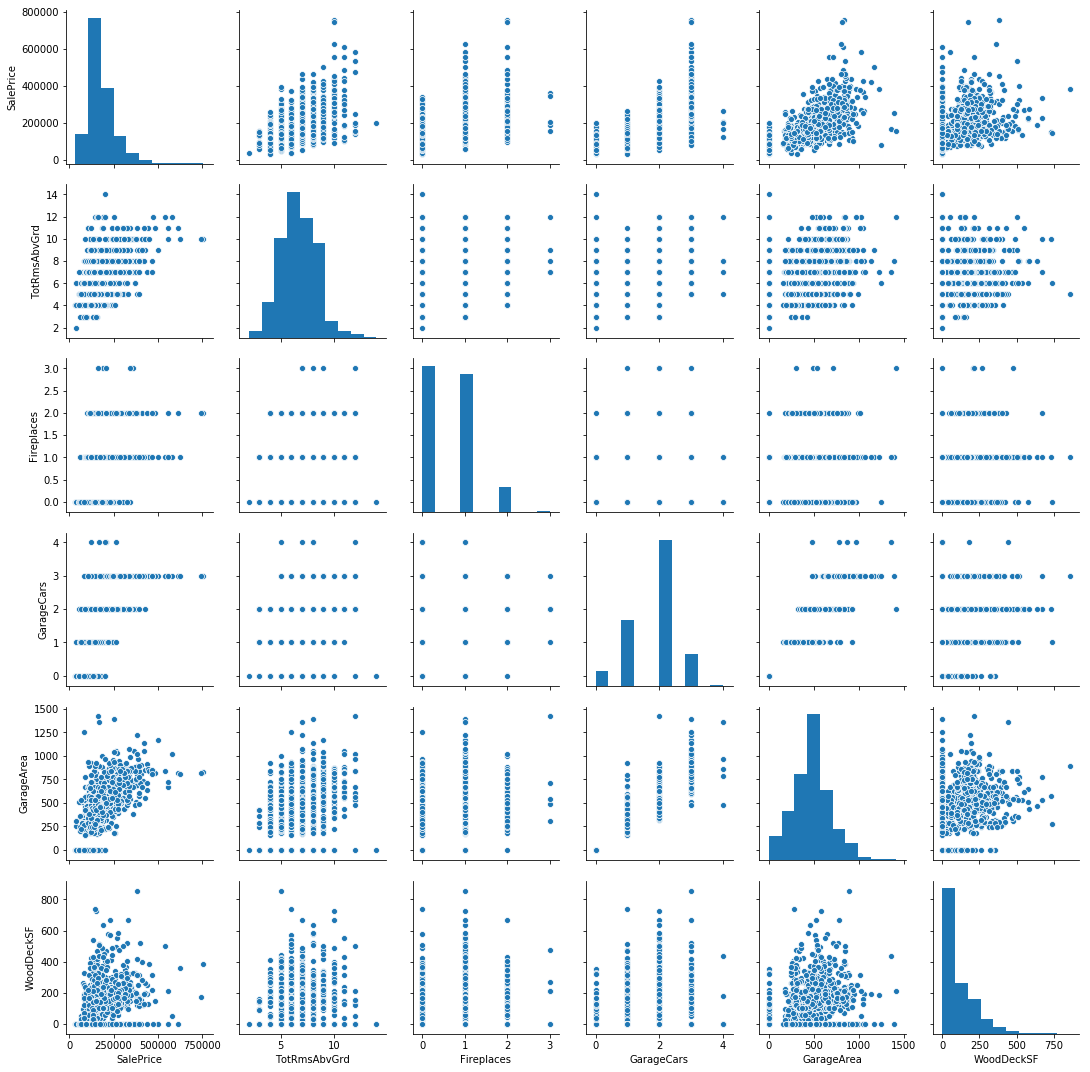

In [30]:
sns.pairplot(train_df, vars = ['SalePrice']+ xint[21:26]) 

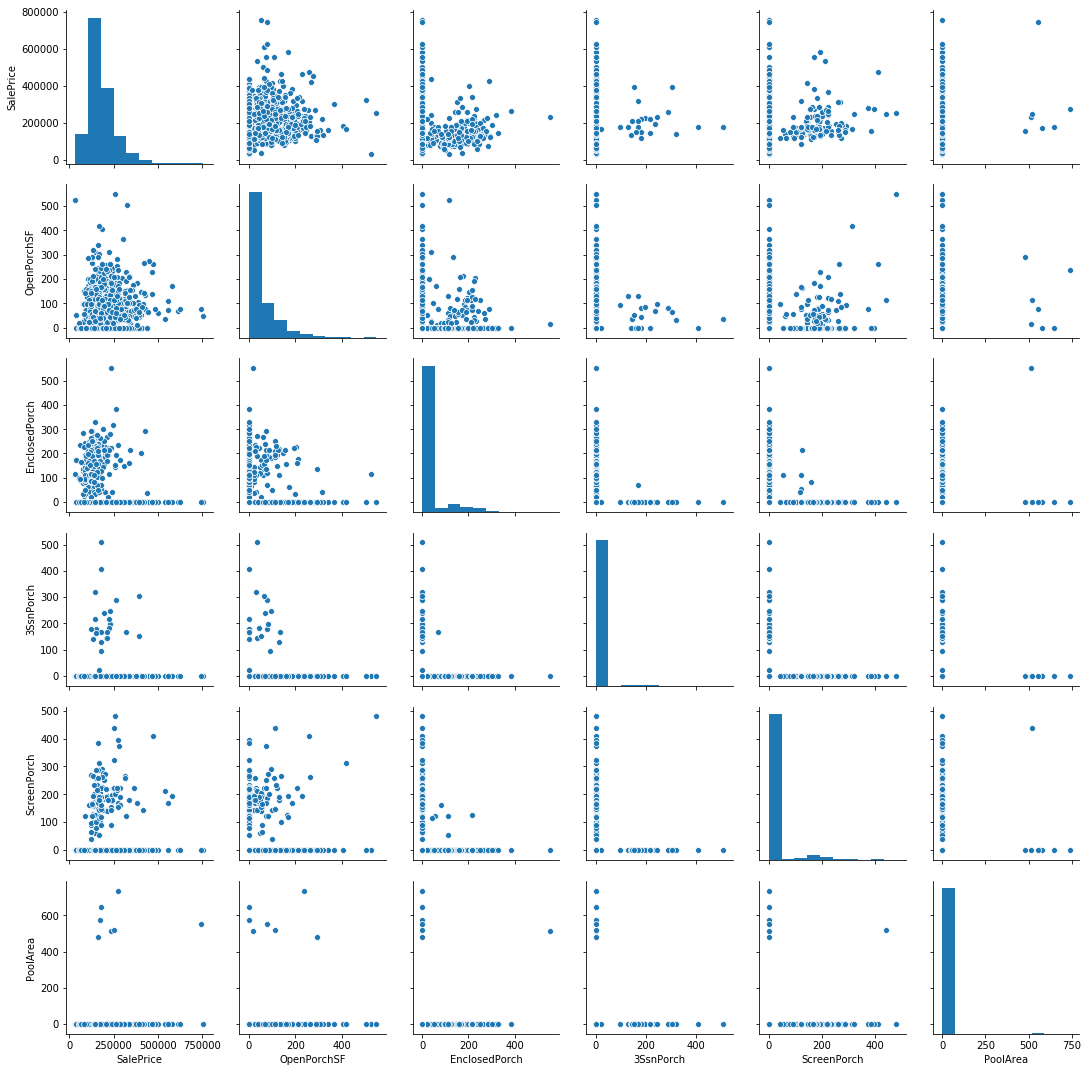

In [31]:
sns.pairplot(train_df, vars = ['SalePrice']+ xint[26:31]) 

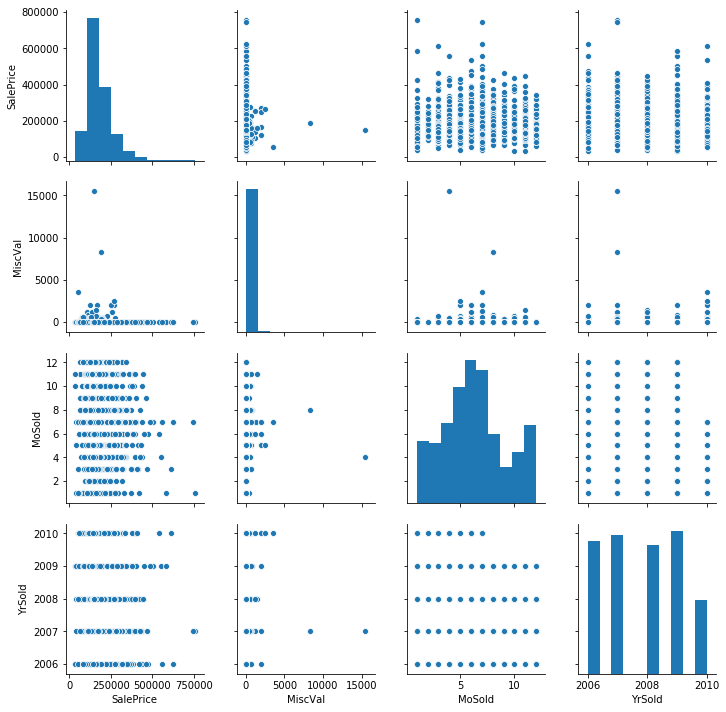

In [32]:
sns.pairplot(train_df, vars = ['SalePrice']+ xint[31:34]) 

/Users/aungshumaan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


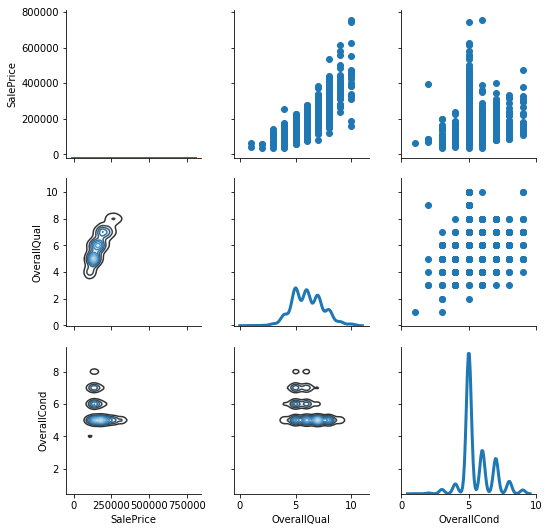

In [33]:
#Just test
g  = sns.PairGrid(train_df, vars = ['SalePrice']+ xint[3:5]) 
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [35]:
train_ID = train_df['Id']
test_ID = test_df['Id']

# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [36]:
train_df.shape, test_df.shape

((1460, 80), (1459, 79))

In [37]:
y_train = train_df['SalePrice']
X_train = train_df.drop('SalePrice', axis=1)
X_test = test_df.copy()
#del train_df, test_df

In [38]:
X_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [39]:
X_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [40]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [41]:
X_train.shape , X_test.shape

((1460, 79), (1459, 79))

In [42]:
all_data = pd.concat([X_train, X_test], ignore_index=True)
all_data.shape

(2919, 79)

## Imputing missing values 

In [43]:
(all_data.isnull().sum()/ len(all_data) * 100).sort_values(ascending=False).head(35)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
BsmtFullBath     0.068517
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Exterior1st      0.034258
SaleType         0.034258
Electrical       0.034258
KitchenQual      0.034258
GarageArea       0.034258
GarageCars       0.034258
OverallQual      0.000000
dtype: float64

In [44]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Missing Ratio
PoolQC            99.657417
MiscFeature       96.402878
Alley             93.216855
Fence             80.438506
FireplaceQu       48.646797
LotFrontage       16.649538
GarageFinish       5.447071
GarageYrBlt        5.447071
GarageQual         5.447071
GarageCond         5.447071
GarageType         5.378554
BsmtExposure       2.809181
BsmtCond           2.809181
BsmtQual           2.774923
BsmtFinType2       2.740665
BsmtFinType1       2.706406
MasVnrType         0.822199
MasVnrArea         0.787941
MSZoning           0.137033
BsmtFullBath       0.068517

In [45]:
all_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [46]:
#BsmtExposure       38
#BsmtFinType2       38
#BsmtFinType1       37
#BsmtCond           37
#BsmtQual           37

In [47]:
#before
print(all_data['BsmtExposure'].unique())
print(all_data['BsmtFinType1'].unique())
print(all_data['BsmtFinType2'].unique())
print(all_data['BsmtCond'].unique())
print(all_data['BsmtCond'].unique())

['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['TA' 'Gd' nan 'Fa' 'Po']
['TA' 'Gd' nan 'Fa' 'Po']


In [48]:
all_data.LotFrontage = all_data.LotFrontage.fillna(all_data.LotFrontage.dropna().median())
all_data.GarageYrBlt = all_data.GarageYrBlt.fillna(all_data.GarageYrBlt.dropna().median())

for c in all_data.columns:
    if all_data[c].dtype == 'object':
        all_data[c] = all_data[c].fillna('Unavailable')
    else:
        all_data[c] = all_data[c].fillna(0)

In [49]:
#after
print(all_data['BsmtExposure'].unique())
print(all_data['BsmtFinType1'].unique())
print(all_data['BsmtFinType2'].unique())
print(all_data['BsmtCond'].unique())
print(all_data['BsmtCond'].unique())

['No' 'Gd' 'Mn' 'Av' 'Unavailable']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'Unavailable' 'LwQ']
['Unf' 'BLQ' 'Unavailable' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['TA' 'Gd' 'Unavailable' 'Fa' 'Po']
['TA' 'Gd' 'Unavailable' 'Fa' 'Po']


In [50]:
#after imputing
(all_data.isnull().sum()/ len(all_data) * 100).sort_values(ascending=False).head(10)

SaleCondition    0.0
Foundation       0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
BsmtQual         0.0
dtype: float64

## Changing certain numerical columns to categorical

In [51]:
#for c in all_data.columns:
#    print(c, len(all_data[c].unique()), all_data[c].unique()[:10])

In [52]:
all_data.OverallQual.head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

In [53]:
#before
print(all_data.MSSubClass.dtype)
print(all_data.OverallCond.dtype)
print(all_data.OverallCond.dtype)
print(all_data.GarageCars.dtype)
print(all_data.YrSold.dtype)

int64
int64
int64
float64
int64


In [54]:
all_data.MSSubClass = all_data.MSSubClass.astype('category')
all_data.OverallQual = all_data.OverallQual.astype('category')
all_data.OverallCond = all_data.OverallCond.astype('category')
all_data.GarageCars = all_data.GarageCars.astype('category')
all_data.YrSold = all_data.YrSold.astype('category')

In [55]:
#after
print(all_data.MSSubClass.dtype)
print(all_data.OverallCond.dtype)
print(all_data.OverallCond.dtype)
print(all_data.GarageCars.dtype)
print(all_data.YrSold.dtype)

category
category
category
category
category


In [56]:
all_data.MSSubClass.dtype,all_data.OverallCond.dtype,all_data.OverallCond.dtype, all_data.GarageCars.dtype, all_data.YrSold.dtype

(CategoricalDtype(categories=[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160,
                   180, 190],
                  ordered=False),
 CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=False),
 CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=False),
 CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], ordered=False),
 CategoricalDtype(categories=[2006, 2007, 2008, 2009, 2010], ordered=False))

In [57]:
all_data.Fireplaces.value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [58]:
#Can be done like this
all_data['Fireplaces'] = np.where(all_data['Fireplaces'] == 0, 'No', 'Yes')
#OR
#all_data['Fireplaces'] = all_data['Fireplaces'].astype(str)
#all_data.loc[all_data.Fireplaces!='0','Fireplaces'] = 'Yes'
#all_data.loc[all_data.Fireplaces=='0','Fireplaces'] = 'No'

In [59]:
all_data.Fireplaces.head()

0     No
1    Yes
2    Yes
3    Yes
4    Yes
Name: Fireplaces, dtype: object

In [60]:
all_data.Fireplaces.value_counts()

Yes    1499
No     1420
Name: Fireplaces, dtype: int64

In [61]:
all_data.PoolArea.unique()

array([  0, 512, 648, 576, 555, 480, 519, 738, 144, 368, 444, 228, 561,
       800])

In [62]:
all_data.PoolArea.value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [63]:
all_data.PoolQC.value_counts()

Unavailable    2909
Gd                4
Ex                4
Fa                2
Name: PoolQC, dtype: int64

In [64]:
#Can be done like this
all_data['PoolArea'] = np.where(all_data['PoolArea'] == 0, 'No', 'Yes')
#all_data['PoolArea'] = all_data['PoolArea'].astype(str)
#all_data.loc[all_data.PoolArea!='0','PoolArea'] = 'Yes'
#all_data.loc[all_data.PoolArea=='0','PoolArea'] = 'No'

In [65]:
all_data.PoolArea.value_counts()

No     2906
Yes      13
Name: PoolArea, dtype: int64

In [66]:
all_data.PoolQC.value_counts() #mismatch between PoolArea and PoolQC, 13 vs 10 non-zero

Unavailable    2909
Gd                4
Ex                4
Fa                2
Name: PoolQC, dtype: int64

## Adding variables together 

In [67]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis = 1, inplace = True)
all_data.shape

(2919, 77)

In [68]:
all_data['TotalBath'] = all_data['BsmtFullBath'] + all_data['BsmtHalfBath'] + all_data['FullBath'] + all_data['HalfBath']
all_data.drop(['HalfBath','FullBath','BsmtHalfBath','BsmtFullBath'], inplace=True, axis=1)
all_data.shape

(2919, 74)

In [69]:
all_data.TotalBath.value_counts()

2.0    1174
3.0     925
1.0     443
4.0     346
5.0      22
6.0       6
8.0       3
Name: TotalBath, dtype: int64

In [70]:
all_data['TotalPorchSF'] = all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']
all_data.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], inplace=True, axis=1)
all_data.shape

(2919, 70)

(array([1.298e+03, 9.910e+02, 4.280e+02, 1.290e+02, 4.900e+01, 1.600e+01,
        2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([   0. ,  142.4,  284.8,  427.2,  569.6,  712. ,  854.4,  996.8,
        1139.2, 1281.6, 1424. ]),
 <a list of 10 Patch objects>)

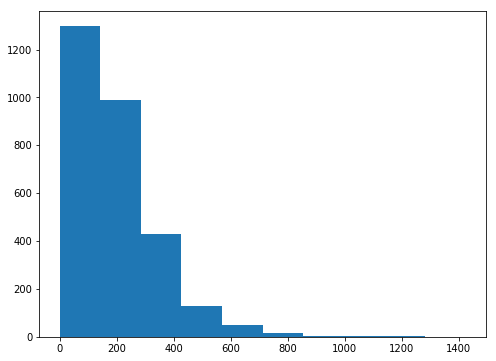

In [71]:
plt.hist(all_data['TotalPorchSF'])

In [72]:
X_train = all_data[:y_train.shape[0]]
X_test = all_data[y_train.shape[0]:]
print(X_train.shape, X_test.shape, y_train.shape)

(1460, 70) (1459, 70) (1460,)


## Transformation of target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22c5b3c8>,
      dtype=object)

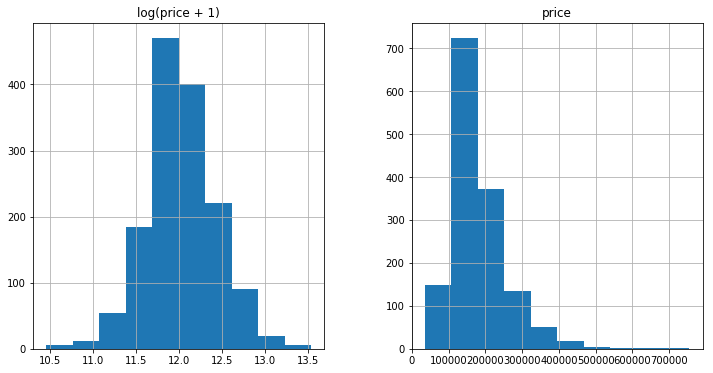

In [73]:
plt.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({"price":y_train, "log(price + 1)":np.log1p(y_train)})
prices.hist()

-0.07692396374428875


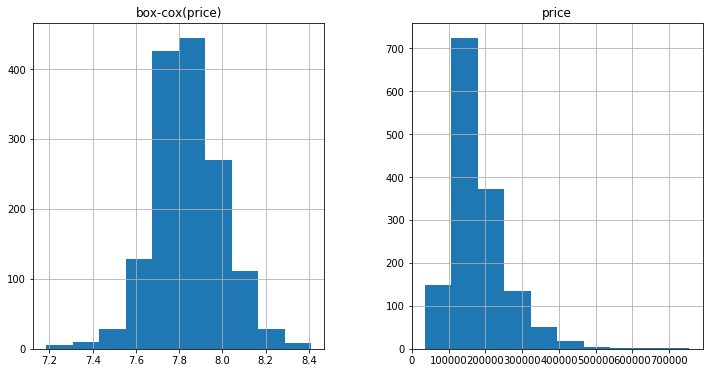

In [74]:
from scipy.stats import boxcox
y_box, lambda_ = boxcox(y_train )
prices = pd.DataFrame({"price":y_train, "box-cox(price)":y_box})
prices.hist()
print(lambda_)

## Transformation of numerical features

In [75]:
#Find numeric features in train and test data (except "SalePrice")
numeric_feats = all_data._get_numeric_data().columns
print(numeric_feats)
X_train_numeric  = X_train[numeric_feats]
X_train_numeric.head()

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'MiscVal', 'MoSold', 'TotalSF', 'TotalBath',
       'TotalPorchSF'],
      dtype='object')


LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0       706.0   
1         80.0     9600       1976          1976         0.0       978.0   
2         68.0    11250       2001          2002       162.0       486.0   
3         60.0     9550       1915          1970         0.0       216.0   
4         84.0    14260       2000          2000       350.0       655.0   

   BsmtFinSF2  BsmtUnfSF  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  \
0         0.0      150.0             0       1710             3             1   
1         0.0      284.0             0       1262             3             1   
2         0.0      434.0             0       1786             3             1   
3         0.0      540.0             0       1717             3             1   
4         0.0      490.0             0       2198             4             1   

   TotRmsAbvGrd  GarageYrBlt  GarageArea  MiscVal  MoSold  TotalSF  TotalBath  \
0             8       2003.0       548.0        0       2   2566.0        4.0   
1             6       1976.0       460.0        0       5   2524.0        3.0   
2             6       2001.0       608.0        0       9   2706.0        4.0   
3             7       1998.0       642.0        0       2   2473.0        2.0   
4             9       2000.0       836.0        0      12   3343.0        4.0   

   TotalPorchSF  
0            61  
1           298  
2            42  
3           307  
4           276

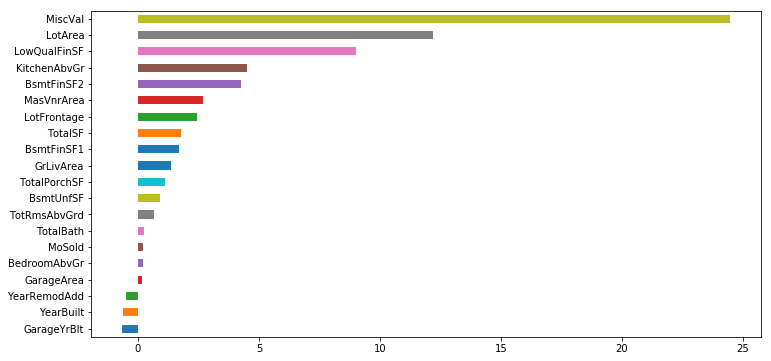

In [76]:
plt.rcParams['figure.figsize'] = (12.0,6.0)
X_train_numeric.skew().sort_values().plot.barh()

In [77]:
X_train_skew = pd.DataFrame({'skewed' :X_train_numeric.skew()>0.75}) 
high_skew_feats = X_train_skew[X_train_skew.skewed].index
print(high_skew_feats)
X_train[high_skew_feats].head()

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'MiscVal',
       'TotalSF', 'TotalPorchSF'],
      dtype='object')


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0       706.0         0.0      150.0   
1         80.0     9600         0.0       978.0         0.0      284.0   
2         68.0    11250       162.0       486.0         0.0      434.0   
3         60.0     9550         0.0       216.0         0.0      540.0   
4         84.0    14260       350.0       655.0         0.0      490.0   

   LowQualFinSF  GrLivArea  KitchenAbvGr  MiscVal  TotalSF  TotalPorchSF  
0             0       1710             1        0   2566.0            61  
1             0       1262             1        0   2524.0           298  
2             0       1786             1        0   2706.0            42  
3             0       1717             1        0   2473.0           307  
4             0       2198             1        0   3343.0           276

In [78]:
pd.Series(dict(zip(X_train[high_skew_feats],skew(X_train[high_skew_feats])))).sort_values(ascending =False)

MiscVal         24.451640
LotArea         12.195142
LowQualFinSF     9.002080
KitchenAbvGr     4.483784
BsmtFinSF2       4.250888
MasVnrArea       2.674865
LotFrontage      2.427368
TotalSF          1.774874
BsmtFinSF1       1.683771
GrLivArea        1.365156
TotalPorchSF     1.101180
BsmtUnfSF        0.919323
dtype: float64

MiscVal         24.451640
LotArea         12.195142
LowQualFinSF     9.002080
KitchenAbvGr     4.483784
BsmtFinSF2       4.250888
MasVnrArea       2.674865
LotFrontage      2.427368
TotalSF          1.774874
BsmtFinSF1       1.683771
GrLivArea        1.365156
TotalPorchSF     1.101180
BsmtUnfSF        0.919323
dtype: float64

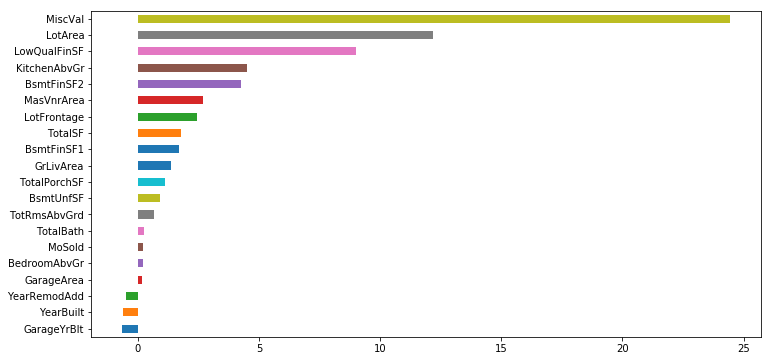

In [79]:
#A different way of doing the same thing
high_skew_feats = X_train_numeric.apply(lambda x: skew(x.dropna()))
high_skew_feats.sort_values().plot.barh()
high_skew_feats = high_skew_feats[high_skew_feats > 0.75]
high_skew_feats.sort_values(ascending =False)

In [80]:
#the log transformation of features should happen for both train and test
high_skew_feats = high_skew_feats.index
all_data[high_skew_feats] = np.log1p(all_data[high_skew_feats])

In [81]:
all_data.shape, X_train.shape, X_test.shape, y_train.shape, y_box.shape

((2919, 70), (1460, 70), (1459, 70), (1460,), (1460,))

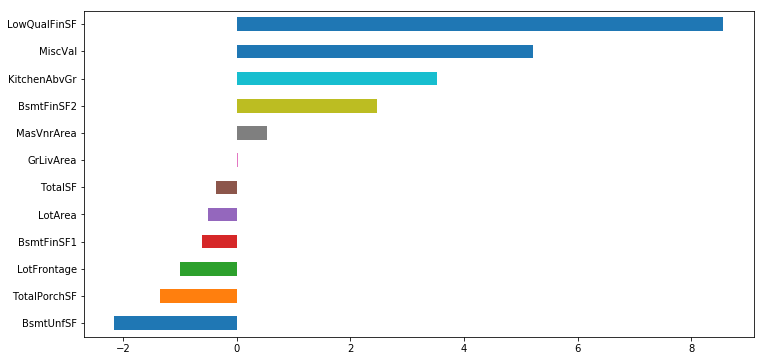

In [82]:
all_data[high_skew_feats].apply(lambda x: skew(x.dropna())).sort_values().plot.barh()

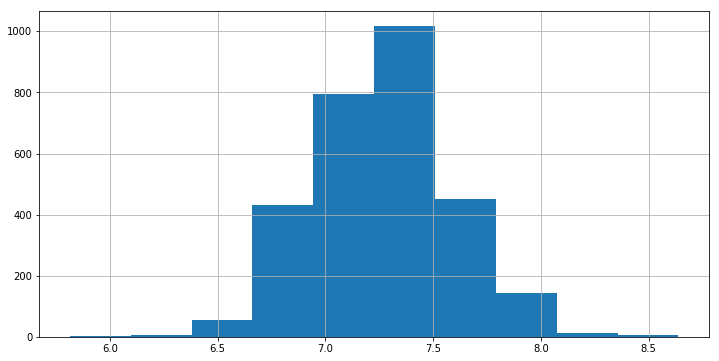

In [83]:
all_data['GrLivArea'].hist()

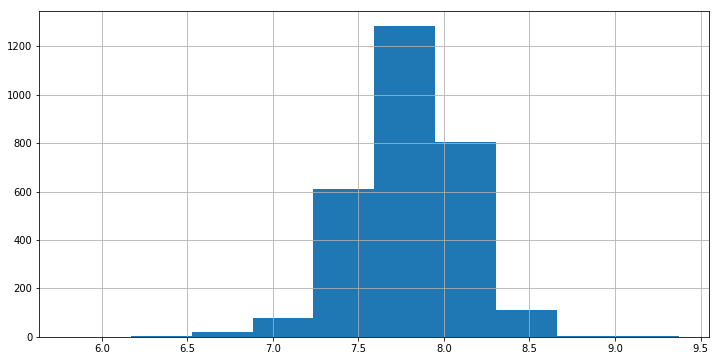

In [84]:
all_data['TotalSF'].hist()

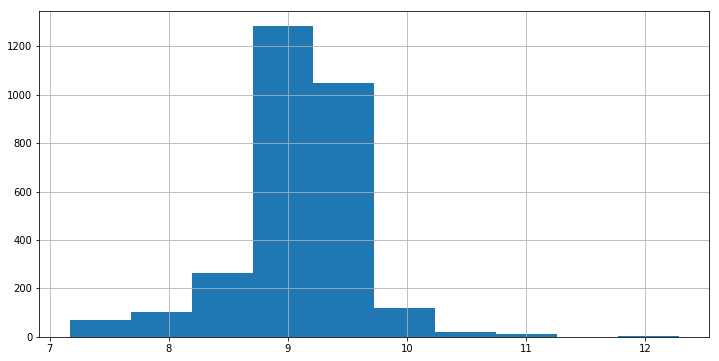

In [85]:
all_data['LotArea'].hist()

## Encoding of categorical variables

In [86]:
#one_hot_df = pd.get_dummies(all_data, drop_first=True)
one_hot_df = pd.get_dummies(all_data, drop_first=True, dummy_na=True)
one_hot_df.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0     4.189655  9.042040       2003          2003    5.283204    6.561031   
1     4.394449  9.169623       1976          1976    0.000000    6.886532   
2     4.234107  9.328212       2001          2002    5.093750    6.188264   
3     4.110874  9.164401       1915          1970    0.000000    5.379897   
4     4.442651  9.565284       2000          2000    5.860786    6.486161   

   BsmtFinSF2  BsmtUnfSF  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  \
0         0.0   5.017280           0.0   7.444833             3      0.693147   
1         0.0   5.652489           0.0   7.141245             3      0.693147   
2         0.0   6.075346           0.0   7.488294             3      0.693147   
3         0.0   6.293419           0.0   7.448916             3      0.693147   
4         0.0   6.196444           0.0   7.695758             4      0.693147   

   TotRmsAbvGrd  GarageYrBlt  GarageArea  MiscVal  MoSold   TotalSF  \
0             8       2003.0       548.0      0.0       2  7.850493   
1             6       1976.0       460.0      0.0       5  7.833996   
2             6       2001.0       608.0      0.0       9  7.903596   
3             7       1998.0       642.0      0.0       2  7.813592   
4             9       2000.0       836.0      0.0      12  8.114923   

   TotalBath  TotalPorchSF  MSSubClass_30.0  MSSubClass_40.0  MSSubClass_45.0  \
0        4.0      4.127134                0                0                0   
1        3.0      5.700444                0                0                0   
2        4.0      3.761200                0                0                0   
3        2.0      5.730100                0                0                0   
4        4.0      5.624018                0                0                0   

   MSSubClass_50.0  MSSubClass_60.0  MSSubClass_70.0  MSSubClass_75.0  \
0                0                1                0                0   
1                0                0                0                0   
2                0                1                0                0   
3                0                0                1                0   
4                0                1                0                0   

   MSSubClass_80.0  MSSubClass_85.0  MSSubClass_90.0  MSSubClass_120.0  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   MSSubClass_150.0  MSSubClass_160.0  MSSubClass_180.0  MSSubClass_190.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   MSSubClass_nan  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0            0            0            1            0   
4               0            0            0            1            0   

   MSZoning_Unavailable  MSZoning_nan  Street_Pave  Street_nan  Alley_Pave  \
0                     0             0            1           0           0   
1                     0             0            1           0           0   
2                     0             0            1           0           0   
3                     0             0    

In [87]:
X_train = one_hot_df[:y_train.shape[0]]
X_test = one_hot_df[y_train.shape[0]:]
print(one_hot_df.shape, X_train.shape, X_test.shape, y_train.shape, y_box.shape)

(2919, 345) (1460, 345) (1459, 345) (1460,) (1460,)


In [88]:
one_hot_df.to_csv('one_hot_df.csv')

In [96]:
x = one_hot_df.columns.to_series().groupby(one_hot_df.dtypes).groups
x , x.keys()

({dtype('uint8'): Index(['MSSubClass_30.0', 'MSSubClass_40.0', 'MSSubClass_45.0',
         'MSSubClass_50.0', 'MSSubClass_60.0', 'MSSubClass_70.0',
         'MSSubClass_75.0', 'MSSubClass_80.0', 'MSSubClass_85.0',
         'MSSubClass_90.0',
         ...
         'SaleType_Oth', 'SaleType_Unavailable', 'SaleType_WD', 'SaleType_nan',
         'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
         'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan'],
        dtype='object', length=325),
  dtype('int64'): Index(['YearBuilt', 'YearRemodAdd', 'BedroomAbvGr', 'TotRmsAbvGrd', 'MoSold'], dtype='object'),
  dtype('float64'): Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
         'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'GarageYrBlt',
         'GarageArea', 'MiscVal', 'TotalSF', 'TotalBath', 'TotalPorchSF'],
        dtype='object')},
 dict_keys([dtype('uint8'), dtype('int64'), dtype('float64')]))

In [100]:
x2  = pd.Series(one_hot_df.columns.to_series().groupby(one_hot_df.dtypes))
print('  ',x2.iloc[0][0],':',len(x2.iloc[0][1]),'\n', 
      x2.iloc[1][0],':',len(x2.iloc[1][1]),'\n ',
      x2.iloc[2][0],':', len(x2.iloc[2][1])) 

   uint8 : 325 
 int64 : 5 
  float64 : 15


In [113]:
new_df = pd.read_csv('one_hot_df.csv')

In [115]:
new_df.columns

Index(['Unnamed: 0', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       ...
       'SaleType_Oth', 'SaleType_Unavailable', 'SaleType_WD', 'SaleType_nan',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan'],
      dtype='object', length=346)

In [119]:
#new_df.drop(columns = 'Unnamed: 0', inplace = True)
new_df.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0     4.189655  9.042040       2003          2003    5.283204    6.561031   
1     4.394449  9.169623       1976          1976    0.000000    6.886532   
2     4.234107  9.328212       2001          2002    5.093750    6.188264   
3     4.110874  9.164401       1915          1970    0.000000    5.379897   
4     4.442651  9.565284       2000          2000    5.860786    6.486161   

   BsmtFinSF2  BsmtUnfSF  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  \
0         0.0   5.017280           0.0   7.444833             3      0.693147   
1         0.0   5.652489           0.0   7.141245             3      0.693147   
2         0.0   6.075346           0.0   7.488294             3      0.693147   
3         0.0   6.293419           0.0   7.448916             3      0.693147   
4         0.0   6.196444           0.0   7.695758             4      0.693147   

   TotRmsAbvGrd  GarageYrBlt  GarageArea  MiscVal  MoSold   TotalSF  \
0             8       2003.0       548.0      0.0       2  7.850493   
1             6       1976.0       460.0      0.0       5  7.833996   
2             6       2001.0       608.0      0.0       9  7.903596   
3             7       1998.0       642.0      0.0       2  7.813592   
4             9       2000.0       836.0      0.0      12  8.114923   

   TotalBath  TotalPorchSF  MSSubClass_30.0  MSSubClass_40.0  MSSubClass_45.0  \
0        4.0      4.127134                0                0                0   
1        3.0      5.700444                0                0                0   
2        4.0      3.761200                0                0                0   
3        2.0      5.730100                0                0                0   
4        4.0      5.624018                0                0                0   

   MSSubClass_50.0  MSSubClass_60.0  MSSubClass_70.0  MSSubClass_75.0  \
0                0                1                0                0   
1                0                0                0                0   
2                0                1                0                0   
3                0                0                1                0   
4                0                1                0                0   

   MSSubClass_80.0  MSSubClass_85.0  MSSubClass_90.0  MSSubClass_120.0  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   MSSubClass_150.0  MSSubClass_160.0  MSSubClass_180.0  MSSubClass_190.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   MSSubClass_nan  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0            0            0            1            0   
4               0            0            0            1            0   

   MSZoning_Unavailable  MSZoning_nan  Street_Pave  Street_nan  Alley_Pave  \
0                     0             0            1           0           0   
1                     0             0            1           0           0   
2                     0             0            1           0           0   
3                     0             0    